# <center><font color=navy>Data Science for Quantitative Finance</font></center>
## <center><font color=navy>Examples of Algo Trading Strategies and Paradigms</font> </center>
### <center> Ali Habibnia</center>

    
<center> Assistant Professor, Department of Economics, </center>
<center> and Division of Computational Modeling & Data Analytics at Virginia Tech</center>
<center> habibnia@vt.edu </center> 


  ○ 	Developing an AlgoTrading System Process


    1. Trading​ ​Strategy:​
    2. Programming​ ​skills:
    3. Trading​ ​software:​
    4. Data: (Ex: alternative data)
    5. Backend​ ​infrastructure:
    6. Regulatory approval:


**All the algorithmic trading strategies that are being used today can be classified broadly into the following​ ​categories:**


# Trend- and Momentum-Based Strategies

## Moving average crossover


Moving average crossover is considered as "Hello word" and the first step when you want to delve into algorithmic trading strategies and Quantitative trading.

The first type of crossover strategies is price crossover;


1. Calculate n day **SMA**
2. **Long position:** Enter trade when price closes above the moving average. Exit the trade when the price closes below the moving average.
3. **Short position:** Sell Short when price closes below the moving average. Buy to Cover when price closes above the moving average





### **Python code:**


####  Libraries & Data

In [6]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
import seaborn


*   Get OHLC data

*   Stock name: ***Goldman Sachs Group Inc (GS)***


In [10]:
df= web.get_data_yahoo('GS',start= '2016-01-01', end='2020-08-12')

df=df[['Open','High','Low','Close']]
df.tail()

,Open,High,Low,Close
Date,,,,
2020-08-06,205.000000,206.289993,203.830002,204.250000
2020-08-07,203.479996,208.800003,202.449997,208.270004
2020-08-10,209.589996,210.639999,208.039993,209.380005
2020-08-11,212.720001,216.949997,210.529999,211.059998
2020-08-12,214.699997,215.949997,209.270004,212.130005


*   Plotting Closing Prices Using *Matplotlib* 

Text(0.5, 1.0, 'Goldman Sachs Group Inc_Close price')

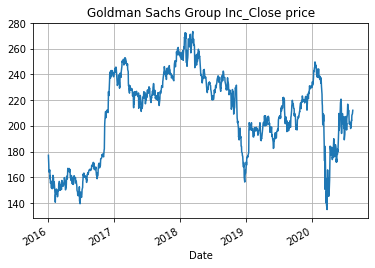

In [11]:
df['Close'].plot(grid=True)
plt.title("Goldman Sachs Group Inc_Close price")

#  Strategy's body

##### Moving average crossover

In [12]:
SMA_window = 100

signals = pd.DataFrame (index=df.index)
signals['signal'] = 0.0

#SMA 
signals['mavg'] = df['Close'].rolling(window = SMA_window, min_periods=1, center= False).mean()

#create signals
signals['signal'][SMA_window:] = np.where(((signals['mavg'][SMA_window:]) > df['Close'][SMA_window:]), 1.0, 0.0) 

#Generate Trading orders
signals['positions'] = signals['signal'].diff()
print(signals)

            signal        mavg  positions
Date                                     
2016-01-04     0.0  177.139999        NaN
2016-01-05     0.0  175.614998        0.0
2016-01-06     0.0  173.689997        0.0
2016-01-07     0.0  171.422497        0.0
2016-01-08     0.0  169.925998        0.0
...            ...         ...        ...
2020-08-06     0.0  188.159200        0.0
2020-08-07     0.0  188.655200        0.0
2020-08-10     0.0  189.348800        0.0
2020-08-11     0.0  189.964500        0.0
2020-08-12     0.0  190.701700        0.0

[1161 rows x 3 columns]


*  Final Plot

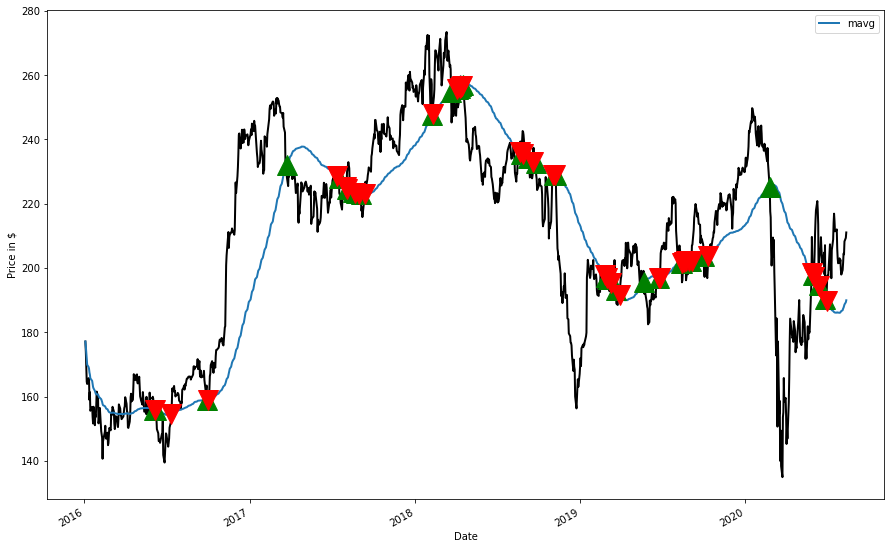

In [10]:
#Initialize the plot figure
fig = plt.figure (figsize=(15,10))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel ='Price in $')

#Plot the closing price
df['Close'].plot(ax=ax1, color='black', lw=2. )

#Plot the moving average 
signals[['mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals 
ax1.plot(signals.loc[signals.positions == 1.0].index, signals.mavg[signals.positions == 1.0], '^', markersize=20, color='g')

#Plot the sell signals 
ax1.plot(signals.loc[signals.positions == -1.0].index, signals.mavg[signals.positions == -1.0], 'v', markersize=20, color='r')

#Show the plot 
plt.show()

## Dual Moving average crossover


 This trading strategy could be simplified in these four steps:
1. Calculate 5 day **SMA** (shorter lookback period SMA)

2. Calculate 20 day **SMA** (longer lookback period SMA)

3. **Long position:** Enter trade when the (shorter lookback period) 5 day SMA is larger than or equal to (longer lookback period) 20 day SMA.

4. **Short position:** Sell Short when the (shorter lookback period) 5 day SMA is smaller than (longer lookback period) 20 day SMA





### **Python code:**


#### Dual Moving average crossover

In [13]:
short_window = 40
long_window = 100

signals = pd.DataFrame (index=df.index)
signals['signal_d'] = 0.0

#SMA of short window 
signals['short_mavg'] = df['Close'].rolling(window = short_window, min_periods=1, center= False).mean()

#SMA of long window 
signals['long_mavg'] = df['Close'].rolling(window = long_window, min_periods=1, center= False).mean()

#create signals
signals['signal_d'][short_window:] = np.where(((signals['short_mavg'][short_window:]) > signals['long_mavg'][short_window:]), 1.0, 0.0) 

#Generate Trading orders
signals['positions_D'] = signals['signal_d'].diff()
print(signals)

            signal_d  short_mavg   long_mavg  positions_D
Date                                                     
2016-01-04       0.0  177.139999  177.139999          NaN
2016-01-05       0.0  175.614998  175.614998          0.0
2016-01-06       0.0  173.689997  173.689997          0.0
2016-01-07       0.0  171.422497  171.422497          0.0
2016-01-08       0.0  169.925998  169.925998          0.0
...              ...         ...         ...          ...
2020-08-06       1.0  203.450001  188.159200          0.0
2020-08-07       1.0  203.803501  188.655200          0.0
2020-08-10       1.0  203.993501  189.348800          0.0
2020-08-11       1.0  204.112251  189.964500          0.0
2020-08-12       1.0  204.175751  190.701700          0.0

[1161 rows x 4 columns]


*  Final Plot

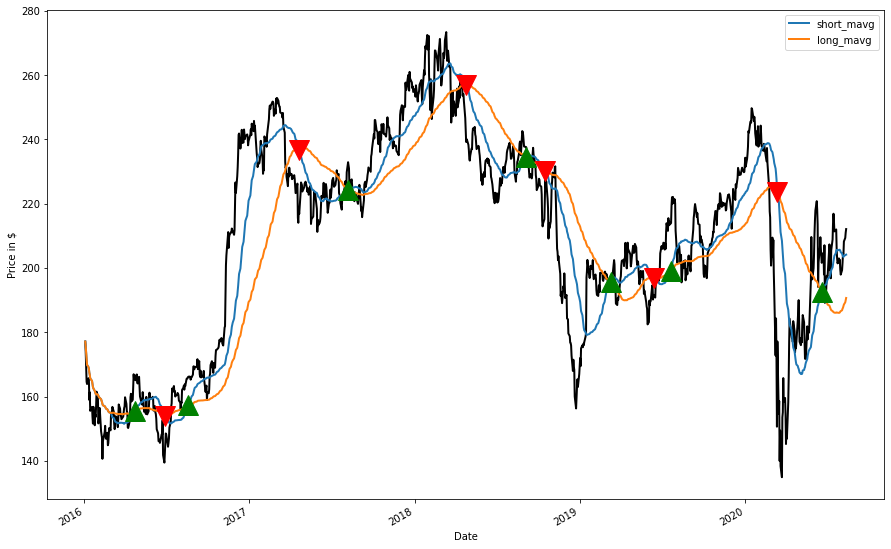

In [14]:
#Initialize the plot figure
fig = plt.figure (figsize=(15,10))

#Add a subplot and label for y-axis
ax1 = fig.add_subplot(111, ylabel ='Price in $')

#Plot the closing price
df['Close'].plot(ax=ax1, color='black', lw=2. )

#Plot the short and long moving average 
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

#Plot the buy signals 
ax1.plot(signals.loc[signals.positions_D==1.0].index, signals.short_mavg[signals.positions_D == 1.0], '^', markersize=20, color='g')

#Plot the sell signals 
ax1.plot(signals.loc[signals.positions_D == -1.0].index, signals.short_mavg[signals.positions_D == -1.0], 'v', markersize=20, color='r')

#Show the plot 
plt.show()


## Technical Analysis of Stocks using TA-Lib

In [15]:
import talib as ta
import pandas as pd
import matplotlib.pyplot as plt

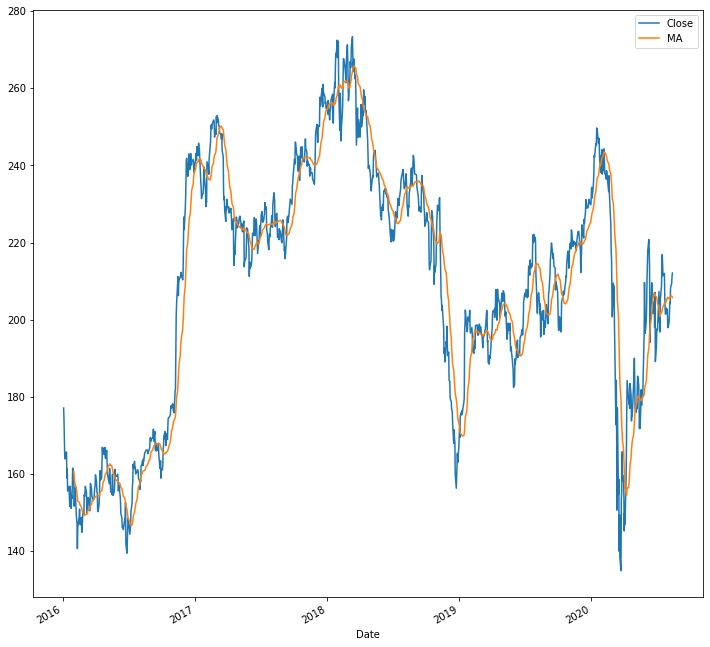

In [16]:
# Simple Moving Average

df['MA'] = ta.SMA(df['Close'],20)
df[['Close','MA']].plot(figsize=(12,12))
plt.show()

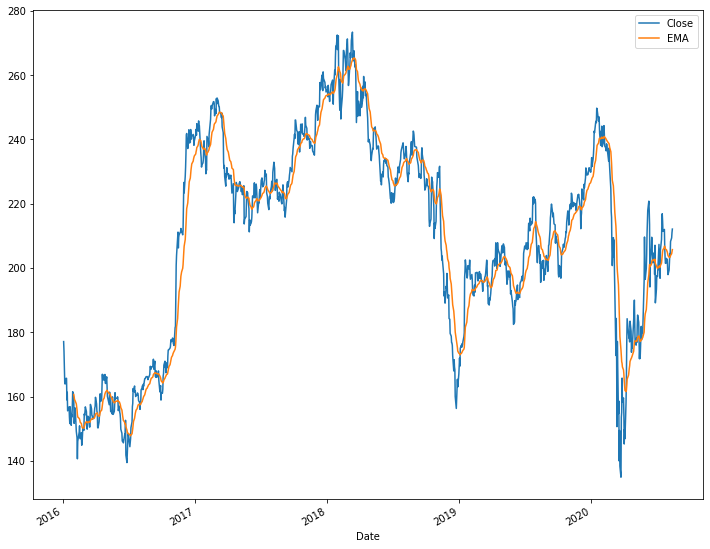

In [17]:
# Exponential Moving Average

df['EMA'] = ta.EMA(df['Close'], timeperiod = 20)
df[['Close','EMA']].plot(figsize=(12,10))
plt.show()

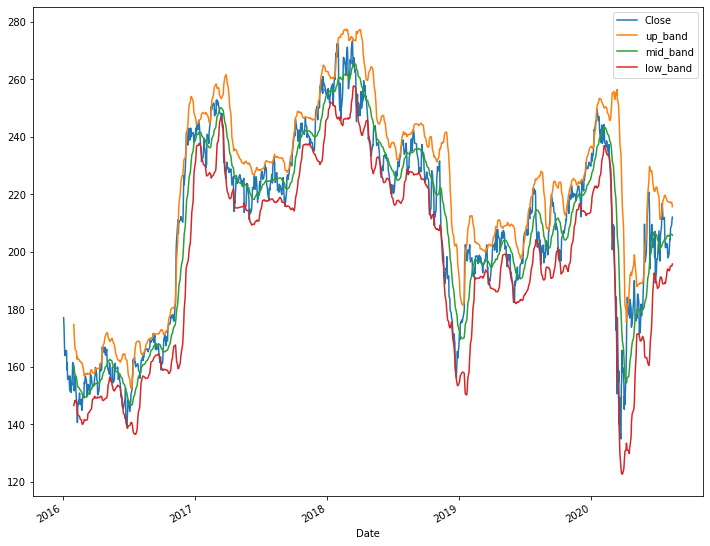

In [18]:
# Bollinger Bands

df['up_band'], df['mid_band'], df['low_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df[['Close','up_band','mid_band','low_band']].plot(figsize=(12,10))
plt.show()

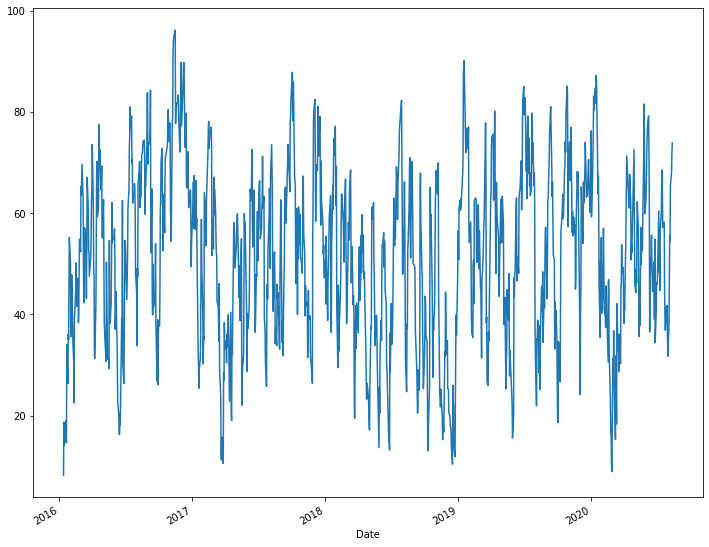

In [19]:
# Relative Strength Index(RSI)

rsi = ta.RSI(df['Close'],7)
rsi.plot(figsize=(12,10))
plt.show()


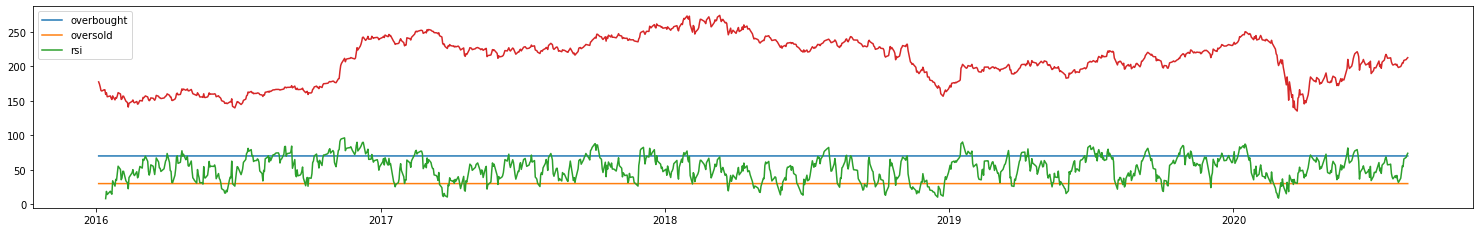

In [20]:
fig = plt.figure()
fig.set_size_inches((20, 14))
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
ax_rsi.plot(df.index, [70] * len(df.index), label="overbought")
ax_rsi.plot(df.index, [30] * len(df.index), label="oversold")
ax_rsi.plot(df.index, rsi, label="rsi")
ax_rsi.plot(df["Close"])
ax_rsi.legend()

In [21]:
section = None
sections = []
for i in range(len(rsi)): 
    if rsi[i] < 30:
        section = 'oversold'
    elif rsi[i] > 70:
        section = 'overbought'
    else:
        section = None
    sections.append(section)

In [22]:
trades = []
for i in range(1,len(sections)):
    trade = None
    if sections[i-1] == 'oversold' and sections[i] == None:
        trade = True
    if sections[i-1] == 'overbought' and sections[i] == None:
        trade = False
    trades.append(trade)

In [23]:
acp = df['Close'][len(df['Close'])-len(trades):].values
profit = 0
qty = 10
for i in range(len(acp)-1):
    true_trade = None
    if acp[i] < acp[i+1]:
        true_trade = True
    elif acp[i] > acp[i+1]:
        true_trade = False
    if trades[i] == true_trade:
        profit += abs(acp[i+1] - acp[i]) * qty
    elif trades[i] != true_trade:
        profit += -abs(acp[i+1] - acp[i]) * qty

In [24]:
profit

-28684.400634765625

# Mean Reversion Trading Strategies 

Mean-reversion strategies work on the assumption that the price of an asset is prone to random fluctuation around an underlying stable trend. Therefore, values deviating far from the trend or observed mean will tend to reverse direction and revert to the mean. If the value is unusually high, we expect it to go back down and go up if it is unusually low.

## Single-stock mean reversion

Mean reversion in the context of a stock price implies that periods of the price being far below the mean are followed by periods of the price going up, and vice versa. We can take advantage of this by buying the stock to go long when the price is lower than expected, and selling to go short when the price is higher than expected. We can plot the price of a stock along with the mean of the prices up to each day to see whether the price reverts to the mean.  Note that since we are computing the running average, "reverting to the mean" does not necessarily mean going as high or as low as it did before. In order to trade using this strategy, we need to quantify what it means for the price to be higher or lower than expected. It's useful to compute the z-score of the price on each day, which tells us how many standard deviations away from the mean a value is: $$ z = \frac{x - \mu}{\sigma} $$
where $x$ is the value, $\mu$ is the mean of the data set, and $\sigma$ is its standard deviation. So a price with a z-score $> 1$ is more than one standard deviation above the mean, and we will sell short when this happens. If the price on a day has a z-score $< 1$, we will buy long. If the price is within half a standard deviation of the mean, we will clear all positions.

In [ ]:
# Compute the cumulative moving average of the price
df['mu'] = [df['Close'][:i].mean() for i in range(len(df))]
# Plot the price and the moving average
plt.figure(figsize=(15,7))
plt.plot(df['Close'])
plt.plot(df['mu']);
plt.show()

In [ ]:
# Compute the z-scores for each day using the historical data up to that day
zscores = [(df['Close'][i] - df['mu'][i]) / np.std(df['Close'][:i]) for i in range(len(df))]

# Start with no money and no positions
money = 0
count = 0
for i in range(len(df)):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        money += df['Close'][i]
        count -= 1
    # Buy long if the z-score is < 1
    elif zscores[i] < -1:
        money -= df['Close'][i]
        count += 1
    # Clear positions if the z-score between -.5 and .5
    elif abs(zscores[i]) < 0.5:
        money += count*df['Close'][i]
        count = 0
print (money)

## Pairs Trading

In pairs trading, the quantity we are examining is the distance between two securities, which we expect to revert back to its mean. For this to be a reasonable assumption, we need the two securities to be statistically cointegrated. In practice, two companies whose products are substitutes for each other are often cointegrated. That is, they generally move together due to shifts in the market and in their specific industry, and move little relative to each other.
How do we incorporate the prediction about their difference into our portfolio? Suppose we are looking at two securities X and Y. Then we go long in X and short in Y when the two are closer together than expected, and short in X and long in Y when the two are far apart. In this way we remain neutral to the market, industry, and other shifts that cause X and Y to move together, while making money on their difference reverting to the mean. We can quantify "closer than expected" as the difference having a z-score of less than -1, and "farther apart than expected" as a z-score greater than 1. This is easier to picture if X's price is higher than Y's, but the end result is the same in either case.
Using the coint function from statsmodels, let's check whether HP and Microsoft stock prices are cointegrated.

In [ ]:
from statsmodels.tsa.stattools import coint

# Load prices data for HP and Microsoft
data = web.get_data_yahoo(['pep', 'co'],start= '2016-01-01', end='2020-08-12')
X = data['Close']['pep']
Y = data['Close']['co']
# Compute the p-value for the cointegration of the two series
coint_t, pvalue, crit_value = coint(X,Y)
print (coint_t, pvalue, crit_value)

Cointegration, very loosely speaking, is a "different" form of correlation. If two series are cointegrated, the ratio between them will vary around a mean. For pairs trading to work between two timeseries, the expected value of the ratio over time must converge to the mean, i.e. they should be cointegrated. 

The Null hypothesis is that there is no cointegration, the alternative hypothesis is that there is cointegrating relationship. If the pvalue is small, below a critical size, then we can reject the hypothesis that there is no cointegrating relationship.

The p-value is low, so the two series are cointegrated. Next we need to find the mean of the difference. We'll compute the cumulative moving average - that is, the average of all the values up to each day - as though we were looking at the data every day without knowing the future.

In [ ]:
# Plot their difference and the cumulative moving average of their difference
val = pd.DataFrame(index = X.index, columns=['diff','mu'])
val['diff'] = X - Y
val['mu']= [val['diff'][:i].mean() for i in range(len(val['diff']))]
plt.figure(figsize=(15,7))
plt.plot(val['diff'], label='X-Y')
plt.plot(val['mu'], label='CMA')
plt.legend();

From here our trading strategy is identical to that for a single security, where we replace the asset with the spread X-Y. When we short the spread, we buy Y and sell X, and vice versa for going long. We'll be using the CMA for the mean, but you can easily change it to MA to see the difference. Keep in mind, however, that what works well with this data may not be suited for other situations, and each definition of the mean will sometimes outperform the other.

In [ ]:
# Compute the z-score of the difference on each day
zscores = [(val['diff'][i] - val['mu'][i]) / np.std(val['diff'][:i]) for i in range(len(val['diff']))]

# Start with no money and no positions
money = 0
count = 0
for i in range(len(val['diff'])):
    # Sell short if the z-score is > 1
    if zscores[i] > 1:
        money += val['diff'][i]
        count -= 1
    # Buy long if the z-score is < 1
    elif zscores[i] < -1:
        money -= val['diff'][i]
        count += 1
    # Clear positions if the z-score between -.5 and .5
    elif abs(zscores[i]) < 0.5:
        money += count*val['diff'][i]
        count = 0
        
print (money)

## Making a Stock Screener with Python

Stock Screeners are a wonderful way to find the perfect stocks for your specific trading strategy. Let's take a look at Mark Minervini’s Trend Template as an example. We will see how to develop our own trading strategy based on combination of different indicators and through the backtesting procidure.

1. The current price of the security must be greater than the 150 and 200-day simple moving averages.
2. The 150-day simple moving average must be greater than the 200-day simple moving average.
3. The 200-day simple moving average must be trending up for at least 1 month.
4. The 50-day simple moving average must be greater than the 150 simple moving average and the 200 simple moving average.
5. The current price must be greater than the 50-day simple moving average.
6. The current price must be at least 30% above the 52 week low.
7. The current price must be within 25% of the 52 week high.
8. The IBD RS-Rating must be greater than 70 (the higher, the better). The RS rating is a metric of a stock’s price performance over the last year compared to all other stocks and the overall market. 



In [ ]:
! pip install yahoo_fin

In [ ]:
from pandas_datareader import data as pdr
from yahoo_fin import stock_info as si
from pandas import ExcelWriter
import yfinance as yf
import pandas as pd
import datetime
import time
import os
yf.pdr_override()

# Variables
tickers = si.tickers_sp500()
tickers = [item.replace(".", "-") for item in tickers] # Yahoo Finance uses dashes instead of dots
index_name = '^GSPC' # S&P 500
start_date = datetime.datetime.now() - datetime.timedelta(days=365)
end_date = datetime.date.today()
exportList = pd.DataFrame(columns=['Stock', "RS_Rating", "50 Day MA", "150 Day Ma", "200 Day MA", "52 Week Low", "52 week High"])
returns_multiples = []

In [ ]:
# Index Returns
index_df = pdr.get_data_yahoo(index_name, start_date, end_date)
index_df['Percent Change'] = index_df['Adj Close'].pct_change()
index_return = (index_df['Percent Change'] + 1).cumprod()[-1]

if not os.path.exists('ScanMarket'):
    os.makedirs('ScanMarket')

# Find top 30% performing stocks (relative to the S&P 500)
for ticker in tickers:
    # Download historical data as CSV for each stock (makes the process faster)
    df = pdr.get_data_yahoo(ticker, start_date, end_date)
    df.to_csv(f'ScanMarket/{ticker}.csv')

    # Calculating returns relative to the market (returns multiple)
    df['Percent Change'] = df['Adj Close'].pct_change()
    stock_return = (df['Percent Change'] + 1).cumprod()[-1]
    
    returns_multiple = round((stock_return / index_return), 2)
    returns_multiples.extend([returns_multiple])
    
    print (f'Ticker: {ticker}; Returns Multiple against S&P 500: {returns_multiple}\n')
    time.sleep(1)

# Creating dataframe of only top 30%
rs_df = pd.DataFrame(list(zip(tickers, returns_multiples)), columns=['Ticker', 'Returns_multiple'])
rs_df['RS_Rating'] = rs_df.Returns_multiple.rank(pct=True) * 100
rs_df = rs_df[rs_df.RS_Rating >= rs_df.RS_Rating.quantile(.70)]

In [ ]:
# Checking Minervini conditions of top 30% of stocks in given list
rs_stocks = rs_df['Ticker']
for stock in rs_stocks:    
    try:
        df = pd.read_csv(f'{stock}.csv', index_col=0)
        sma = [50, 150, 200]
        for x in sma:
            df["SMA_"+str(x)] = round(df['Adj Close'].rolling(window=x).mean(), 2)
        
        # Storing required values 
        currentClose = df["Adj Close"][-1]
        moving_average_50 = df["SMA_50"][-1]
        moving_average_150 = df["SMA_150"][-1]
        moving_average_200 = df["SMA_200"][-1]
        low_of_52week = round(min(df["Low"][-260:]), 2)
        high_of_52week = round(max(df["High"][-260:]), 2)
        RS_Rating = round(rs_df[rs_df['Ticker']==stock].RS_Rating.tolist()[0])
        
        try:
            moving_average_200_20 = df["SMA_200"][-20]
        except Exception:
            moving_average_200_20 = 0

        # Condition 1: Current Price > 150 SMA and > 200 SMA
        condition_1 = currentClose > moving_average_150 > moving_average_200
        
        # Condition 2: 150 SMA and > 200 SMA
        condition_2 = moving_average_150 > moving_average_200

        # Condition 3: 200 SMA trending up for at least 1 month
        condition_3 = moving_average_200 > moving_average_200_20
        
        # Condition 4: 50 SMA> 150 SMA and 50 SMA> 200 SMA
        condition_4 = moving_average_50 > moving_average_150 > moving_average_200
           
        # Condition 5: Current Price > 50 SMA
        condition_5 = currentClose > moving_average_50
           
        # Condition 6: Current Price is at least 30% above 52 week low
        condition_6 = currentClose >= (1.3*low_of_52week)
           
        # Condition 7: Current Price is within 25% of 52 week high
        condition_7 = currentClose >= (.75*high_of_52week)
        
        # If all conditions above are true, add stock to exportList
        if(condition_1 and condition_2 and condition_3 and condition_4 and condition_5 and condition_6 and condition_7):
            exportList = exportList.append({'Stock': stock, "RS_Rating": RS_Rating ,"50 Day MA": moving_average_50, "150 Day Ma": moving_average_150, "200 Day MA": moving_average_200, "52 Week Low": low_of_52week, "52 week High": high_of_52week}, ignore_index=True)
            print (stock + " made the Minervini requirements")
    except Exception as e:
        print (e)
        print(f"Could not gather data on {stock}")

exportList = exportList.sort_values(by='RS_Rating', ascending=False)
print('\n', exportList)

#writer = ExcelWriter("ScanMarket/ScreenOutput.xlsx")
#exportList.to_excel(writer, "Sheet1")
#writer.save()